# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

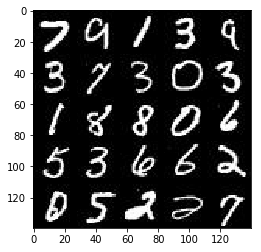

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

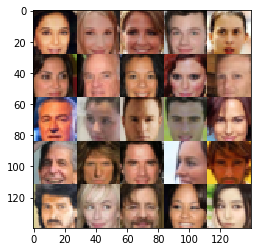

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [2]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #Create Placeholders of input images, Z and learning rate
    input_real = tf.placeholder(tf.float32, shape = (None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, shape = (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [12]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse = reuse):
        #alpha is the param for leaky relu
        alpha=0.2
        
      
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        n1 = tf.layers.batch_normalization(x1, training=True)
        relu1 = tf.maximum(alpha * n1, n1)
        #16x16x128
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        n2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * n2, n2)
        #8x8x256
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        n3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * n3, n3)
        #4x4x512

        #flat = tf.reshape(relu3, (-1, 4*4*512))
        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [13]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    alpha=0.1
    with tf.variable_scope('generator', reuse = reuse):
        #Fully connected layer
        x1 = tf.layers.dense(z,  7 * 7 * 512)
        #Reshape the fully connected layer to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha*x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2, x2)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #To help the discriminator generalize better, the labels are reduced a bit from 1.0 to 0.9,
    #using the parameter smooth. Typically used with classifiers to improve performance.
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real,labels = tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    #Optimize
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [34]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    #Print the current image
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3904... Generator Loss: 4.9936
Epoch 1/2... Discriminator Loss: 1.3820... Generator Loss: 1.2214
Epoch 1/2... Discriminator Loss: 1.4660... Generator Loss: 0.7253
Epoch 1/2... Discriminator Loss: 0.4900... Generator Loss: 6.0649
Epoch 1/2... Discriminator Loss: 0.5826... Generator Loss: 2.4508
Epoch 1/2... Discriminator Loss: 1.0772... Generator Loss: 1.1191
Epoch 1/2... Discriminator Loss: 0.8965... Generator Loss: 1.7806
Epoch 1/2... Discriminator Loss: 1.7189... Generator Loss: 0.9388
Epoch 1/2... Discriminator Loss: 1.5375... Generator Loss: 0.5277
Epoch 1/2... Discriminator Loss: 2.2718... Generator Loss: 0.2042


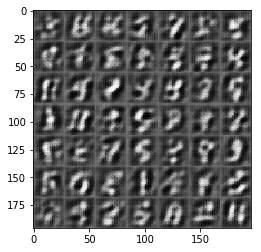

Epoch 1/2... Discriminator Loss: 0.8946... Generator Loss: 2.0851
Epoch 1/2... Discriminator Loss: 2.1822... Generator Loss: 0.2513
Epoch 1/2... Discriminator Loss: 2.3728... Generator Loss: 0.2336
Epoch 1/2... Discriminator Loss: 1.4991... Generator Loss: 0.4453
Epoch 1/2... Discriminator Loss: 2.3012... Generator Loss: 0.2111
Epoch 1/2... Discriminator Loss: 0.8639... Generator Loss: 1.9470
Epoch 1/2... Discriminator Loss: 0.9616... Generator Loss: 0.9781
Epoch 1/2... Discriminator Loss: 0.9915... Generator Loss: 0.9589
Epoch 1/2... Discriminator Loss: 1.0819... Generator Loss: 0.9209
Epoch 1/2... Discriminator Loss: 1.6633... Generator Loss: 0.3482


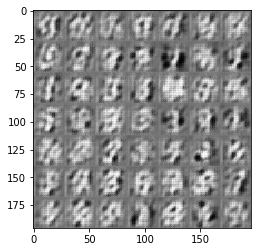

Epoch 1/2... Discriminator Loss: 0.9354... Generator Loss: 1.2567
Epoch 1/2... Discriminator Loss: 1.1896... Generator Loss: 1.7771
Epoch 1/2... Discriminator Loss: 1.5551... Generator Loss: 0.4594
Epoch 1/2... Discriminator Loss: 1.6404... Generator Loss: 0.3989
Epoch 1/2... Discriminator Loss: 0.9747... Generator Loss: 1.3513
Epoch 1/2... Discriminator Loss: 1.5631... Generator Loss: 1.5193
Epoch 1/2... Discriminator Loss: 0.8140... Generator Loss: 1.2315
Epoch 1/2... Discriminator Loss: 1.0695... Generator Loss: 0.7396
Epoch 1/2... Discriminator Loss: 1.0648... Generator Loss: 0.7570
Epoch 1/2... Discriminator Loss: 1.0908... Generator Loss: 1.2949


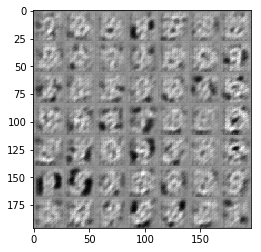

Epoch 1/2... Discriminator Loss: 1.3834... Generator Loss: 0.5203
Epoch 1/2... Discriminator Loss: 1.0810... Generator Loss: 1.2813
Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 1.1251
Epoch 1/2... Discriminator Loss: 1.4164... Generator Loss: 0.5676
Epoch 1/2... Discriminator Loss: 1.0002... Generator Loss: 1.2622
Epoch 1/2... Discriminator Loss: 1.3790... Generator Loss: 0.5458
Epoch 1/2... Discriminator Loss: 1.1868... Generator Loss: 1.2695
Epoch 1/2... Discriminator Loss: 1.3558... Generator Loss: 0.6064
Epoch 1/2... Discriminator Loss: 1.9156... Generator Loss: 0.2497
Epoch 1/2... Discriminator Loss: 1.1160... Generator Loss: 0.7987


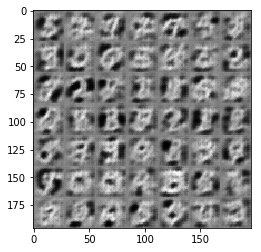

Epoch 1/2... Discriminator Loss: 1.2272... Generator Loss: 1.2753
Epoch 1/2... Discriminator Loss: 1.4280... Generator Loss: 0.4452
Epoch 1/2... Discriminator Loss: 1.5736... Generator Loss: 1.0486
Epoch 1/2... Discriminator Loss: 1.1634... Generator Loss: 0.7865
Epoch 1/2... Discriminator Loss: 1.3599... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 1.3661... Generator Loss: 0.8116
Epoch 1/2... Discriminator Loss: 1.2878... Generator Loss: 0.8399
Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 1.5704
Epoch 1/2... Discriminator Loss: 1.1559... Generator Loss: 0.7390
Epoch 1/2... Discriminator Loss: 1.3861... Generator Loss: 0.8024


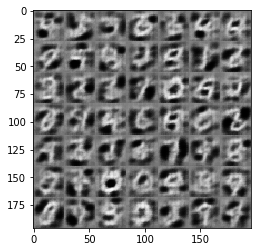

Epoch 1/2... Discriminator Loss: 1.0846... Generator Loss: 1.5583
Epoch 1/2... Discriminator Loss: 1.5662... Generator Loss: 1.6323
Epoch 1/2... Discriminator Loss: 1.1458... Generator Loss: 0.7859
Epoch 1/2... Discriminator Loss: 1.5930... Generator Loss: 0.4322
Epoch 1/2... Discriminator Loss: 1.2215... Generator Loss: 0.7124
Epoch 1/2... Discriminator Loss: 1.0755... Generator Loss: 1.9001
Epoch 1/2... Discriminator Loss: 1.2811... Generator Loss: 1.6612
Epoch 1/2... Discriminator Loss: 1.7334... Generator Loss: 0.3115
Epoch 1/2... Discriminator Loss: 1.1020... Generator Loss: 0.6768
Epoch 1/2... Discriminator Loss: 1.2440... Generator Loss: 0.7546


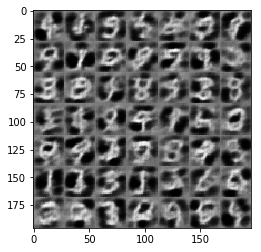

Epoch 1/2... Discriminator Loss: 1.4328... Generator Loss: 0.4617
Epoch 1/2... Discriminator Loss: 1.3096... Generator Loss: 1.9381
Epoch 1/2... Discriminator Loss: 1.2889... Generator Loss: 0.6051
Epoch 1/2... Discriminator Loss: 1.7514... Generator Loss: 0.3322
Epoch 1/2... Discriminator Loss: 1.1119... Generator Loss: 1.5349
Epoch 1/2... Discriminator Loss: 1.1232... Generator Loss: 0.7174
Epoch 1/2... Discriminator Loss: 2.0528... Generator Loss: 0.2629
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 1.4202
Epoch 1/2... Discriminator Loss: 1.3218... Generator Loss: 0.6076
Epoch 1/2... Discriminator Loss: 1.8550... Generator Loss: 0.2751


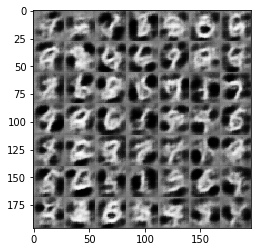

Epoch 1/2... Discriminator Loss: 1.0310... Generator Loss: 0.8835
Epoch 1/2... Discriminator Loss: 1.9960... Generator Loss: 0.2476
Epoch 1/2... Discriminator Loss: 1.3183... Generator Loss: 0.5943
Epoch 1/2... Discriminator Loss: 1.0319... Generator Loss: 0.8221
Epoch 1/2... Discriminator Loss: 1.1668... Generator Loss: 0.6475
Epoch 1/2... Discriminator Loss: 1.6320... Generator Loss: 0.4543
Epoch 1/2... Discriminator Loss: 0.9094... Generator Loss: 1.0181
Epoch 1/2... Discriminator Loss: 0.9107... Generator Loss: 1.5312
Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 0.6185
Epoch 1/2... Discriminator Loss: 1.1444... Generator Loss: 1.1273


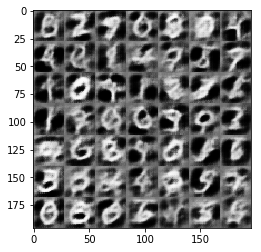

Epoch 1/2... Discriminator Loss: 1.1080... Generator Loss: 0.7994
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 0.6465
Epoch 1/2... Discriminator Loss: 1.0677... Generator Loss: 2.1541
Epoch 1/2... Discriminator Loss: 1.2640... Generator Loss: 0.8450
Epoch 1/2... Discriminator Loss: 1.2016... Generator Loss: 0.5867
Epoch 1/2... Discriminator Loss: 2.0770... Generator Loss: 0.2469
Epoch 1/2... Discriminator Loss: 0.7617... Generator Loss: 1.2114
Epoch 1/2... Discriminator Loss: 0.9706... Generator Loss: 1.2433
Epoch 1/2... Discriminator Loss: 1.5137... Generator Loss: 0.4988
Epoch 1/2... Discriminator Loss: 1.7870... Generator Loss: 0.3010


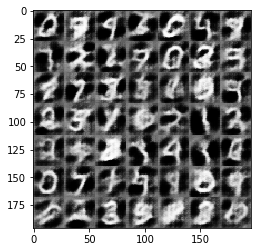

Epoch 1/2... Discriminator Loss: 2.4499... Generator Loss: 0.1637
Epoch 1/2... Discriminator Loss: 2.4462... Generator Loss: 0.1616
Epoch 1/2... Discriminator Loss: 2.2620... Generator Loss: 0.1947
Epoch 1/2... Discriminator Loss: 0.8267... Generator Loss: 1.0357
Epoch 1/2... Discriminator Loss: 1.4748... Generator Loss: 0.4256
Epoch 1/2... Discriminator Loss: 1.1095... Generator Loss: 0.6964
Epoch 1/2... Discriminator Loss: 1.4233... Generator Loss: 0.8025
Epoch 1/2... Discriminator Loss: 1.1178... Generator Loss: 0.9881
Epoch 1/2... Discriminator Loss: 1.9479... Generator Loss: 0.3131
Epoch 1/2... Discriminator Loss: 0.8640... Generator Loss: 1.0687


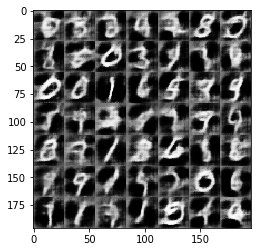

Epoch 1/2... Discriminator Loss: 0.7960... Generator Loss: 2.8272
Epoch 1/2... Discriminator Loss: 1.6971... Generator Loss: 0.3450
Epoch 1/2... Discriminator Loss: 0.9559... Generator Loss: 1.8103
Epoch 1/2... Discriminator Loss: 1.0278... Generator Loss: 0.8411
Epoch 1/2... Discriminator Loss: 1.8539... Generator Loss: 3.6271
Epoch 1/2... Discriminator Loss: 0.8684... Generator Loss: 1.1407
Epoch 1/2... Discriminator Loss: 1.7336... Generator Loss: 0.3135
Epoch 1/2... Discriminator Loss: 0.8523... Generator Loss: 2.1359
Epoch 1/2... Discriminator Loss: 0.9342... Generator Loss: 1.1946
Epoch 1/2... Discriminator Loss: 1.7155... Generator Loss: 0.3634


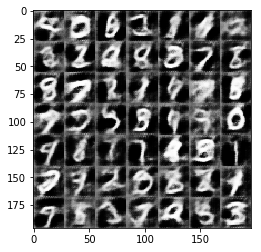

Epoch 1/2... Discriminator Loss: 1.8100... Generator Loss: 0.3194
Epoch 1/2... Discriminator Loss: 1.2996... Generator Loss: 0.5581
Epoch 1/2... Discriminator Loss: 1.3478... Generator Loss: 0.5139
Epoch 1/2... Discriminator Loss: 1.6483... Generator Loss: 0.3531
Epoch 1/2... Discriminator Loss: 1.1119... Generator Loss: 0.8776
Epoch 1/2... Discriminator Loss: 1.0967... Generator Loss: 0.9968
Epoch 1/2... Discriminator Loss: 0.9979... Generator Loss: 0.9867
Epoch 1/2... Discriminator Loss: 0.8679... Generator Loss: 1.0673
Epoch 1/2... Discriminator Loss: 2.0853... Generator Loss: 0.2495
Epoch 1/2... Discriminator Loss: 1.9687... Generator Loss: 0.2879


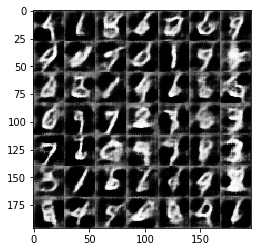

Epoch 1/2... Discriminator Loss: 1.4833... Generator Loss: 0.4336
Epoch 1/2... Discriminator Loss: 1.0655... Generator Loss: 0.7174
Epoch 1/2... Discriminator Loss: 1.1105... Generator Loss: 1.8774
Epoch 1/2... Discriminator Loss: 0.6673... Generator Loss: 1.6384
Epoch 1/2... Discriminator Loss: 3.0251... Generator Loss: 0.1064
Epoch 1/2... Discriminator Loss: 1.5854... Generator Loss: 0.3795
Epoch 1/2... Discriminator Loss: 0.7166... Generator Loss: 1.2204
Epoch 1/2... Discriminator Loss: 0.9538... Generator Loss: 1.9913
Epoch 1/2... Discriminator Loss: 1.1686... Generator Loss: 0.7115
Epoch 1/2... Discriminator Loss: 1.4878... Generator Loss: 0.4893


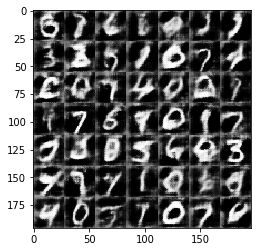

Epoch 1/2... Discriminator Loss: 1.3402... Generator Loss: 0.5424
Epoch 1/2... Discriminator Loss: 0.6805... Generator Loss: 1.8424
Epoch 1/2... Discriminator Loss: 1.4964... Generator Loss: 0.5906
Epoch 1/2... Discriminator Loss: 1.3770... Generator Loss: 0.6754
Epoch 1/2... Discriminator Loss: 1.1993... Generator Loss: 0.5930
Epoch 1/2... Discriminator Loss: 2.1412... Generator Loss: 0.2100
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 2.8765
Epoch 1/2... Discriminator Loss: 1.1719... Generator Loss: 0.6291
Epoch 1/2... Discriminator Loss: 0.8970... Generator Loss: 1.0224
Epoch 1/2... Discriminator Loss: 3.0205... Generator Loss: 0.0939


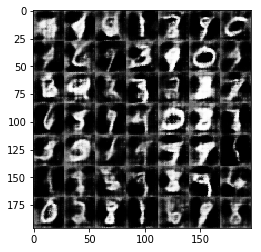

Epoch 1/2... Discriminator Loss: 1.1065... Generator Loss: 0.8224
Epoch 1/2... Discriminator Loss: 1.9082... Generator Loss: 0.3478
Epoch 1/2... Discriminator Loss: 0.8608... Generator Loss: 1.5919
Epoch 1/2... Discriminator Loss: 0.8824... Generator Loss: 1.1304
Epoch 1/2... Discriminator Loss: 2.9889... Generator Loss: 0.1142
Epoch 1/2... Discriminator Loss: 0.6388... Generator Loss: 1.5198
Epoch 1/2... Discriminator Loss: 0.7718... Generator Loss: 1.1339
Epoch 1/2... Discriminator Loss: 1.3767... Generator Loss: 0.5976
Epoch 1/2... Discriminator Loss: 2.2349... Generator Loss: 0.2616
Epoch 1/2... Discriminator Loss: 1.8784... Generator Loss: 0.3068


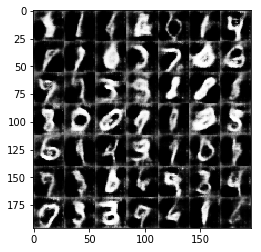

Epoch 1/2... Discriminator Loss: 0.9759... Generator Loss: 0.8512
Epoch 1/2... Discriminator Loss: 0.9286... Generator Loss: 0.9663
Epoch 1/2... Discriminator Loss: 1.1130... Generator Loss: 0.8418
Epoch 1/2... Discriminator Loss: 2.3979... Generator Loss: 0.2258
Epoch 1/2... Discriminator Loss: 1.0451... Generator Loss: 0.7432
Epoch 1/2... Discriminator Loss: 0.6154... Generator Loss: 2.3010
Epoch 1/2... Discriminator Loss: 0.8505... Generator Loss: 1.1633
Epoch 1/2... Discriminator Loss: 0.8321... Generator Loss: 1.0158
Epoch 1/2... Discriminator Loss: 0.9131... Generator Loss: 0.8920
Epoch 1/2... Discriminator Loss: 1.8096... Generator Loss: 0.2808


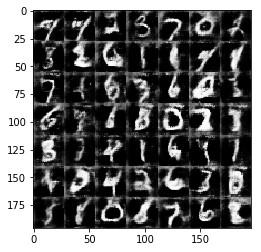

Epoch 1/2... Discriminator Loss: 1.8569... Generator Loss: 0.3230
Epoch 1/2... Discriminator Loss: 1.4415... Generator Loss: 0.6026
Epoch 1/2... Discriminator Loss: 0.8904... Generator Loss: 1.0861
Epoch 1/2... Discriminator Loss: 1.4997... Generator Loss: 2.7545
Epoch 1/2... Discriminator Loss: 0.8100... Generator Loss: 1.1194
Epoch 1/2... Discriminator Loss: 0.9193... Generator Loss: 1.0414
Epoch 1/2... Discriminator Loss: 1.6147... Generator Loss: 0.4089
Epoch 1/2... Discriminator Loss: 1.4508... Generator Loss: 0.4945
Epoch 1/2... Discriminator Loss: 1.4558... Generator Loss: 0.4982
Epoch 1/2... Discriminator Loss: 1.4520... Generator Loss: 0.5417


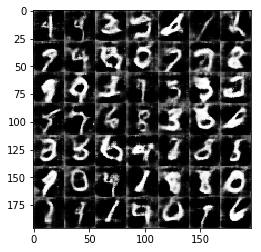

Epoch 1/2... Discriminator Loss: 0.9652... Generator Loss: 0.8989
Epoch 1/2... Discriminator Loss: 0.7571... Generator Loss: 1.7617
Epoch 1/2... Discriminator Loss: 0.6563... Generator Loss: 1.3723
Epoch 1/2... Discriminator Loss: 0.9385... Generator Loss: 0.9394
Epoch 1/2... Discriminator Loss: 0.8369... Generator Loss: 2.4764
Epoch 1/2... Discriminator Loss: 0.7828... Generator Loss: 1.8554
Epoch 1/2... Discriminator Loss: 0.6739... Generator Loss: 1.8451
Epoch 1/2... Discriminator Loss: 1.1145... Generator Loss: 0.9615
Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 0.5588
Epoch 1/2... Discriminator Loss: 0.9012... Generator Loss: 1.0588


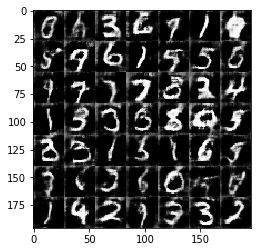

Epoch 1/2... Discriminator Loss: 2.2574... Generator Loss: 2.1286
Epoch 1/2... Discriminator Loss: 0.8968... Generator Loss: 0.9873
Epoch 1/2... Discriminator Loss: 1.4708... Generator Loss: 0.4701
Epoch 1/2... Discriminator Loss: 0.8869... Generator Loss: 1.8154
Epoch 1/2... Discriminator Loss: 0.9116... Generator Loss: 0.9576
Epoch 1/2... Discriminator Loss: 1.1664... Generator Loss: 0.9657
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 0.9416
Epoch 2/2... Discriminator Loss: 1.0708... Generator Loss: 0.7262
Epoch 2/2... Discriminator Loss: 1.4909... Generator Loss: 0.4669
Epoch 2/2... Discriminator Loss: 1.7921... Generator Loss: 0.3250


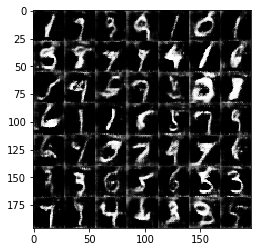

Epoch 2/2... Discriminator Loss: 1.3338... Generator Loss: 0.5807
Epoch 2/2... Discriminator Loss: 0.7233... Generator Loss: 2.2853
Epoch 2/2... Discriminator Loss: 1.3744... Generator Loss: 0.4848
Epoch 2/2... Discriminator Loss: 0.4164... Generator Loss: 2.9254
Epoch 2/2... Discriminator Loss: 1.0454... Generator Loss: 0.8631
Epoch 2/2... Discriminator Loss: 0.5084... Generator Loss: 2.4288
Epoch 2/2... Discriminator Loss: 2.0863... Generator Loss: 0.2486
Epoch 2/2... Discriminator Loss: 1.0128... Generator Loss: 0.7403
Epoch 2/2... Discriminator Loss: 1.0371... Generator Loss: 1.8296
Epoch 2/2... Discriminator Loss: 1.1203... Generator Loss: 0.6856


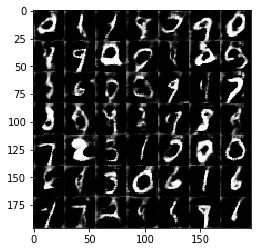

Epoch 2/2... Discriminator Loss: 1.4800... Generator Loss: 0.4229
Epoch 2/2... Discriminator Loss: 0.7936... Generator Loss: 1.1089
Epoch 2/2... Discriminator Loss: 1.2105... Generator Loss: 1.8822
Epoch 2/2... Discriminator Loss: 1.0917... Generator Loss: 2.7579
Epoch 2/2... Discriminator Loss: 1.8632... Generator Loss: 0.3248
Epoch 2/2... Discriminator Loss: 1.3750... Generator Loss: 0.4631
Epoch 2/2... Discriminator Loss: 0.9118... Generator Loss: 1.0470
Epoch 2/2... Discriminator Loss: 0.6938... Generator Loss: 2.0430
Epoch 2/2... Discriminator Loss: 1.4987... Generator Loss: 0.4502
Epoch 2/2... Discriminator Loss: 1.9742... Generator Loss: 0.3308


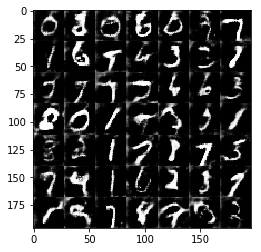

Epoch 2/2... Discriminator Loss: 0.6874... Generator Loss: 1.5815
Epoch 2/2... Discriminator Loss: 1.1148... Generator Loss: 0.8035
Epoch 2/2... Discriminator Loss: 2.1215... Generator Loss: 0.2729
Epoch 2/2... Discriminator Loss: 2.3798... Generator Loss: 0.1896
Epoch 2/2... Discriminator Loss: 0.9381... Generator Loss: 2.0793
Epoch 2/2... Discriminator Loss: 1.1692... Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 0.6236... Generator Loss: 1.4939
Epoch 2/2... Discriminator Loss: 1.3174... Generator Loss: 0.5943
Epoch 2/2... Discriminator Loss: 0.9275... Generator Loss: 1.0417
Epoch 2/2... Discriminator Loss: 1.0333... Generator Loss: 0.7532


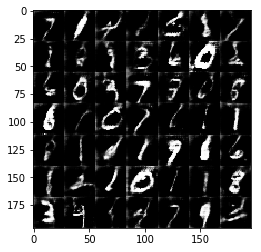

Epoch 2/2... Discriminator Loss: 1.4126... Generator Loss: 0.4989
Epoch 2/2... Discriminator Loss: 0.6360... Generator Loss: 1.7190
Epoch 2/2... Discriminator Loss: 0.7057... Generator Loss: 1.7059
Epoch 2/2... Discriminator Loss: 0.7697... Generator Loss: 1.8685
Epoch 2/2... Discriminator Loss: 1.1055... Generator Loss: 2.3623
Epoch 2/2... Discriminator Loss: 1.2107... Generator Loss: 0.6409
Epoch 2/2... Discriminator Loss: 2.4790... Generator Loss: 0.1447
Epoch 2/2... Discriminator Loss: 0.9858... Generator Loss: 1.0591
Epoch 2/2... Discriminator Loss: 0.6642... Generator Loss: 1.4521
Epoch 2/2... Discriminator Loss: 1.9559... Generator Loss: 0.3664


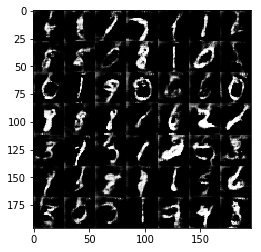

Epoch 2/2... Discriminator Loss: 1.5338... Generator Loss: 0.4626
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 1.3332
Epoch 2/2... Discriminator Loss: 1.3053... Generator Loss: 0.8086
Epoch 2/2... Discriminator Loss: 0.5854... Generator Loss: 2.0480
Epoch 2/2... Discriminator Loss: 1.0487... Generator Loss: 1.0434
Epoch 2/2... Discriminator Loss: 1.7320... Generator Loss: 0.3734
Epoch 2/2... Discriminator Loss: 0.6674... Generator Loss: 1.5668
Epoch 2/2... Discriminator Loss: 0.9958... Generator Loss: 0.7792
Epoch 2/2... Discriminator Loss: 1.7269... Generator Loss: 0.6012
Epoch 2/2... Discriminator Loss: 1.2637... Generator Loss: 0.6780


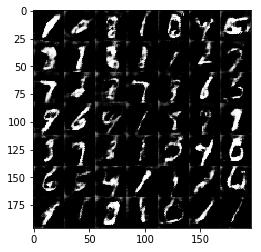

Epoch 2/2... Discriminator Loss: 1.4339... Generator Loss: 0.4695
Epoch 2/2... Discriminator Loss: 1.0955... Generator Loss: 0.8016
Epoch 2/2... Discriminator Loss: 0.8753... Generator Loss: 1.1325
Epoch 2/2... Discriminator Loss: 0.9133... Generator Loss: 1.6887
Epoch 2/2... Discriminator Loss: 0.9000... Generator Loss: 1.2501
Epoch 2/2... Discriminator Loss: 2.1828... Generator Loss: 0.2930
Epoch 2/2... Discriminator Loss: 0.8339... Generator Loss: 0.9931
Epoch 2/2... Discriminator Loss: 0.7690... Generator Loss: 1.7138
Epoch 2/2... Discriminator Loss: 1.2637... Generator Loss: 0.5851
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 0.8025


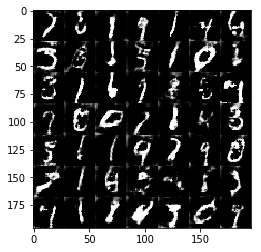

Epoch 2/2... Discriminator Loss: 2.3171... Generator Loss: 0.2235
Epoch 2/2... Discriminator Loss: 0.9910... Generator Loss: 2.9058
Epoch 2/2... Discriminator Loss: 2.0288... Generator Loss: 0.3186
Epoch 2/2... Discriminator Loss: 0.5861... Generator Loss: 1.8905
Epoch 2/2... Discriminator Loss: 2.4146... Generator Loss: 0.2078
Epoch 2/2... Discriminator Loss: 0.7419... Generator Loss: 1.3142
Epoch 2/2... Discriminator Loss: 1.2056... Generator Loss: 0.7803
Epoch 2/2... Discriminator Loss: 0.6034... Generator Loss: 1.9331
Epoch 2/2... Discriminator Loss: 1.1291... Generator Loss: 0.6584
Epoch 2/2... Discriminator Loss: 1.0831... Generator Loss: 0.7685


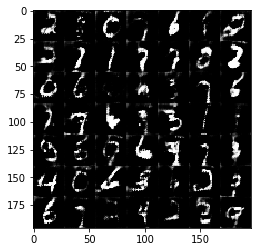

Epoch 2/2... Discriminator Loss: 2.0110... Generator Loss: 0.3363
Epoch 2/2... Discriminator Loss: 2.0620... Generator Loss: 0.2841
Epoch 2/2... Discriminator Loss: 1.5082... Generator Loss: 0.4460
Epoch 2/2... Discriminator Loss: 1.0771... Generator Loss: 0.8871
Epoch 2/2... Discriminator Loss: 1.6973... Generator Loss: 0.4205
Epoch 2/2... Discriminator Loss: 0.5226... Generator Loss: 2.1927
Epoch 2/2... Discriminator Loss: 2.0056... Generator Loss: 0.2328
Epoch 2/2... Discriminator Loss: 0.8098... Generator Loss: 2.0515
Epoch 2/2... Discriminator Loss: 0.6245... Generator Loss: 2.4532
Epoch 2/2... Discriminator Loss: 0.5384... Generator Loss: 2.1471


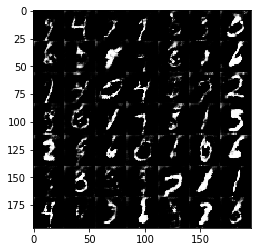

Epoch 2/2... Discriminator Loss: 0.9120... Generator Loss: 3.1985
Epoch 2/2... Discriminator Loss: 0.5744... Generator Loss: 1.7534
Epoch 2/2... Discriminator Loss: 0.9309... Generator Loss: 0.9258
Epoch 2/2... Discriminator Loss: 0.8645... Generator Loss: 1.1692
Epoch 2/2... Discriminator Loss: 0.6597... Generator Loss: 2.9127
Epoch 2/2... Discriminator Loss: 0.5717... Generator Loss: 2.4140
Epoch 2/2... Discriminator Loss: 0.7210... Generator Loss: 1.5103
Epoch 2/2... Discriminator Loss: 0.5087... Generator Loss: 2.2066
Epoch 2/2... Discriminator Loss: 1.0791... Generator Loss: 0.8452
Epoch 2/2... Discriminator Loss: 0.6032... Generator Loss: 3.0469


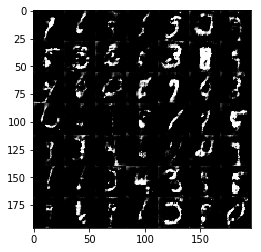

Epoch 2/2... Discriminator Loss: 0.8269... Generator Loss: 2.7096
Epoch 2/2... Discriminator Loss: 0.5949... Generator Loss: 2.1698
Epoch 2/2... Discriminator Loss: 1.3168... Generator Loss: 0.6155
Epoch 2/2... Discriminator Loss: 1.0470... Generator Loss: 0.9194
Epoch 2/2... Discriminator Loss: 0.6500... Generator Loss: 1.7239
Epoch 2/2... Discriminator Loss: 1.0002... Generator Loss: 0.9397
Epoch 2/2... Discriminator Loss: 2.7036... Generator Loss: 0.1345
Epoch 2/2... Discriminator Loss: 1.3234... Generator Loss: 0.6218
Epoch 2/2... Discriminator Loss: 1.2296... Generator Loss: 0.5540
Epoch 2/2... Discriminator Loss: 2.9872... Generator Loss: 0.1485


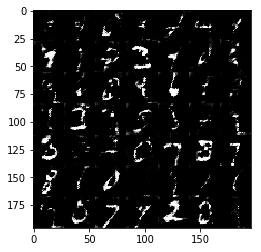

Epoch 2/2... Discriminator Loss: 1.6751... Generator Loss: 3.3599
Epoch 2/2... Discriminator Loss: 1.4365... Generator Loss: 0.5412
Epoch 2/2... Discriminator Loss: 0.9317... Generator Loss: 1.0009
Epoch 2/2... Discriminator Loss: 0.8962... Generator Loss: 1.1366
Epoch 2/2... Discriminator Loss: 1.3347... Generator Loss: 0.7609
Epoch 2/2... Discriminator Loss: 0.9517... Generator Loss: 1.2819
Epoch 2/2... Discriminator Loss: 2.1860... Generator Loss: 0.2286
Epoch 2/2... Discriminator Loss: 2.2993... Generator Loss: 2.6531
Epoch 2/2... Discriminator Loss: 1.9636... Generator Loss: 0.2638
Epoch 2/2... Discriminator Loss: 0.7212... Generator Loss: 2.6796


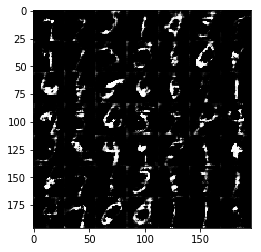

Epoch 2/2... Discriminator Loss: 0.9455... Generator Loss: 1.6634
Epoch 2/2... Discriminator Loss: 1.4163... Generator Loss: 0.5449
Epoch 2/2... Discriminator Loss: 0.7671... Generator Loss: 1.1585
Epoch 2/2... Discriminator Loss: 1.4467... Generator Loss: 0.5804
Epoch 2/2... Discriminator Loss: 0.8990... Generator Loss: 1.0283
Epoch 2/2... Discriminator Loss: 0.9906... Generator Loss: 0.9469
Epoch 2/2... Discriminator Loss: 1.4832... Generator Loss: 0.5341
Epoch 2/2... Discriminator Loss: 1.0071... Generator Loss: 1.0960
Epoch 2/2... Discriminator Loss: 0.6675... Generator Loss: 1.8210
Epoch 2/2... Discriminator Loss: 0.6824... Generator Loss: 1.4638


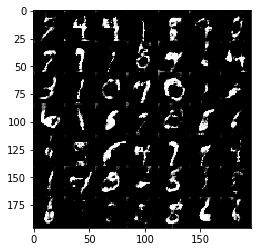

Epoch 2/2... Discriminator Loss: 0.9602... Generator Loss: 0.9270
Epoch 2/2... Discriminator Loss: 0.8773... Generator Loss: 1.4770
Epoch 2/2... Discriminator Loss: 0.9739... Generator Loss: 0.9115
Epoch 2/2... Discriminator Loss: 1.1318... Generator Loss: 0.6927
Epoch 2/2... Discriminator Loss: 2.0497... Generator Loss: 0.3336
Epoch 2/2... Discriminator Loss: 0.6851... Generator Loss: 1.5302
Epoch 2/2... Discriminator Loss: 1.1260... Generator Loss: 1.7903
Epoch 2/2... Discriminator Loss: 0.6543... Generator Loss: 1.8870
Epoch 2/2... Discriminator Loss: 0.7746... Generator Loss: 1.4002
Epoch 2/2... Discriminator Loss: 0.9302... Generator Loss: 1.0395


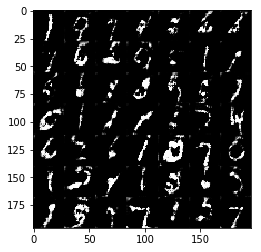

Epoch 2/2... Discriminator Loss: 2.3469... Generator Loss: 0.2978
Epoch 2/2... Discriminator Loss: 1.3823... Generator Loss: 0.6208
Epoch 2/2... Discriminator Loss: 0.5425... Generator Loss: 2.4065
Epoch 2/2... Discriminator Loss: 0.6297... Generator Loss: 1.9331
Epoch 2/2... Discriminator Loss: 0.5621... Generator Loss: 2.0632
Epoch 2/2... Discriminator Loss: 0.9431... Generator Loss: 0.9880
Epoch 2/2... Discriminator Loss: 0.8518... Generator Loss: 1.2840
Epoch 2/2... Discriminator Loss: 0.7974... Generator Loss: 1.1095
Epoch 2/2... Discriminator Loss: 0.4258... Generator Loss: 3.1227
Epoch 2/2... Discriminator Loss: 0.7066... Generator Loss: 1.9455


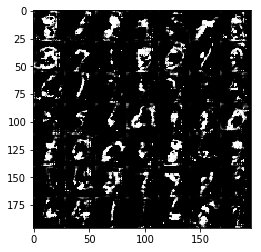

Epoch 2/2... Discriminator Loss: 1.2947... Generator Loss: 0.8407
Epoch 2/2... Discriminator Loss: 0.6106... Generator Loss: 1.4790
Epoch 2/2... Discriminator Loss: 0.6820... Generator Loss: 1.3575
Epoch 2/2... Discriminator Loss: 1.3176... Generator Loss: 0.5625
Epoch 2/2... Discriminator Loss: 1.1529... Generator Loss: 0.7104
Epoch 2/2... Discriminator Loss: 0.6850... Generator Loss: 2.0372
Epoch 2/2... Discriminator Loss: 0.6815... Generator Loss: 1.5799
Epoch 2/2... Discriminator Loss: 0.5290... Generator Loss: 2.4459
Epoch 2/2... Discriminator Loss: 0.7592... Generator Loss: 1.2196
Epoch 2/2... Discriminator Loss: 0.6993... Generator Loss: 1.4708


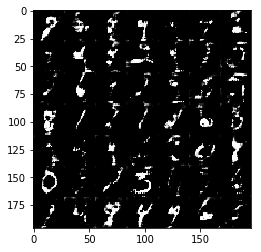

Epoch 2/2... Discriminator Loss: 0.7033... Generator Loss: 1.9494
Epoch 2/2... Discriminator Loss: 0.7675... Generator Loss: 1.2031
Epoch 2/2... Discriminator Loss: 0.5612... Generator Loss: 1.9068
Epoch 2/2... Discriminator Loss: 0.7288... Generator Loss: 1.4725
Epoch 2/2... Discriminator Loss: 0.9087... Generator Loss: 0.9171
Epoch 2/2... Discriminator Loss: 0.7064... Generator Loss: 1.2709
Epoch 2/2... Discriminator Loss: 0.8928... Generator Loss: 1.5971
Epoch 2/2... Discriminator Loss: 0.8497... Generator Loss: 1.1942
Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 2.9676
Epoch 2/2... Discriminator Loss: 1.7428... Generator Loss: 0.3591


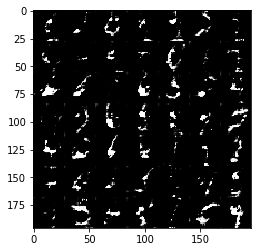

Epoch 2/2... Discriminator Loss: 0.6780... Generator Loss: 1.4903
Epoch 2/2... Discriminator Loss: 1.3021... Generator Loss: 0.5212
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.0572
Epoch 2/2... Discriminator Loss: 0.5545... Generator Loss: 2.0642
Epoch 2/2... Discriminator Loss: 0.9696... Generator Loss: 0.8761
Epoch 2/2... Discriminator Loss: 0.5788... Generator Loss: 2.2381
Epoch 2/2... Discriminator Loss: 0.6800... Generator Loss: 1.6022
Epoch 2/2... Discriminator Loss: 0.5966... Generator Loss: 1.6515
Epoch 2/2... Discriminator Loss: 1.4858... Generator Loss: 0.5606
Epoch 2/2... Discriminator Loss: 0.8205... Generator Loss: 1.2965


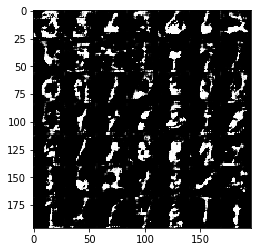

Epoch 2/2... Discriminator Loss: 0.6133... Generator Loss: 1.5300
Epoch 2/2... Discriminator Loss: 1.1758... Generator Loss: 0.5940
Epoch 2/2... Discriminator Loss: 1.3423... Generator Loss: 2.7948
Epoch 2/2... Discriminator Loss: 1.3408... Generator Loss: 0.6327
Epoch 2/2... Discriminator Loss: 0.9017... Generator Loss: 1.0400
Epoch 2/2... Discriminator Loss: 1.2089... Generator Loss: 0.7126
Epoch 2/2... Discriminator Loss: 0.8085... Generator Loss: 1.2412
Epoch 2/2... Discriminator Loss: 0.8807... Generator Loss: 1.2314
Epoch 2/2... Discriminator Loss: 0.5209... Generator Loss: 3.1589
Epoch 2/2... Discriminator Loss: 0.5249... Generator Loss: 2.3425


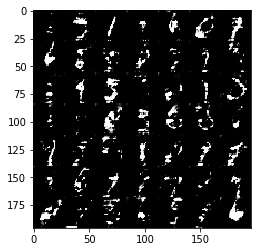

Epoch 2/2... Discriminator Loss: 0.7001... Generator Loss: 1.7101
Epoch 2/2... Discriminator Loss: 2.2618... Generator Loss: 0.2729
Epoch 2/2... Discriminator Loss: 1.3639... Generator Loss: 0.5176
Epoch 2/2... Discriminator Loss: 1.0933... Generator Loss: 0.8646
Epoch 2/2... Discriminator Loss: 1.1296... Generator Loss: 0.9158


In [37]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Starting to generate numbers at the earlier stage.
Generator loss is becoming smaller than dicriminator loss in the early stage in epoch 1.

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7849... Generator Loss: 5.7265
Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 12.6481
Epoch 1/1... Discriminator Loss: 3.1827... Generator Loss: 0.1568
Epoch 1/1... Discriminator Loss: 4.7276... Generator Loss: 0.0265
Epoch 1/1... Discriminator Loss: 1.8769... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 2.1480... Generator Loss: 8.4467
Epoch 1/1... Discriminator Loss: 0.6430... Generator Loss: 2.2153
Epoch 1/1... Discriminator Loss: 1.5588... Generator Loss: 0.4599
Epoch 1/1... Discriminator Loss: 0.5899... Generator Loss: 2.2120
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 7.4722


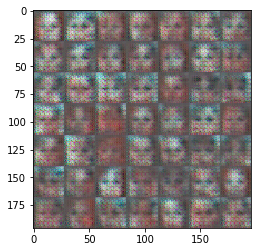

Epoch 1/1... Discriminator Loss: 0.4792... Generator Loss: 2.5836
Epoch 1/1... Discriminator Loss: 0.9252... Generator Loss: 1.0511
Epoch 1/1... Discriminator Loss: 1.5144... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.2187... Generator Loss: 1.1802
Epoch 1/1... Discriminator Loss: 2.5711... Generator Loss: 0.5005
Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 1.3715
Epoch 1/1... Discriminator Loss: 1.7806... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.4812
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 2.9123
Epoch 1/1... Discriminator Loss: 1.1194... Generator Loss: 0.9264


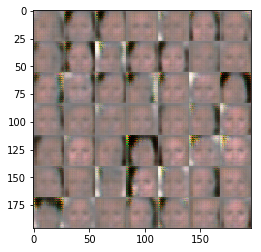

Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 1.1949
Epoch 1/1... Discriminator Loss: 2.4479... Generator Loss: 3.3382
Epoch 1/1... Discriminator Loss: 1.9288... Generator Loss: 2.1882
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 1.5749
Epoch 1/1... Discriminator Loss: 1.6934... Generator Loss: 0.3657
Epoch 1/1... Discriminator Loss: 1.0982... Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 0.8981... Generator Loss: 2.8278
Epoch 1/1... Discriminator Loss: 1.8381... Generator Loss: 2.4841
Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.8096... Generator Loss: 0.3185


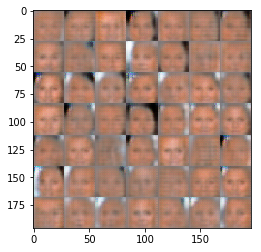

Epoch 1/1... Discriminator Loss: 2.5728... Generator Loss: 4.3800
Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 1.0605
Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.9125
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.5486
Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 1.4170
Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.5886... Generator Loss: 4.2861
Epoch 1/1... Discriminator Loss: 2.4559... Generator Loss: 0.1663
Epoch 1/1... Discriminator Loss: 2.2573... Generator Loss: 0.1842


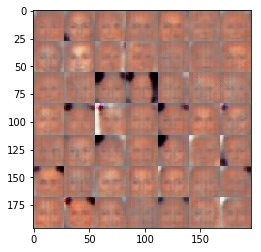

Epoch 1/1... Discriminator Loss: 0.9356... Generator Loss: 1.3380
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.4838
Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 1.2794
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 1.1435
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 1.1115
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 1.6200
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.4652
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 0.8871
Epoch 1/1... Discriminator Loss: 1.5908... Generator Loss: 0.3700


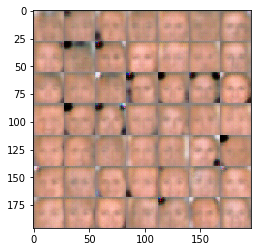

Epoch 1/1... Discriminator Loss: 1.0780... Generator Loss: 1.2229
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 2.5739
Epoch 1/1... Discriminator Loss: 1.4704... Generator Loss: 2.0366
Epoch 1/1... Discriminator Loss: 2.4166... Generator Loss: 3.5197
Epoch 1/1... Discriminator Loss: 1.7332... Generator Loss: 2.1766
Epoch 1/1... Discriminator Loss: 1.7134... Generator Loss: 0.3213
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 1.0825
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 1.1119
Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.4617
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.8369


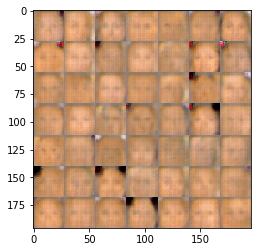

Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.5105
Epoch 1/1... Discriminator Loss: 2.1110... Generator Loss: 3.4497
Epoch 1/1... Discriminator Loss: 1.1775... Generator Loss: 1.1647
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.1079... Generator Loss: 1.1025
Epoch 1/1... Discriminator Loss: 1.1029... Generator Loss: 1.5887
Epoch 1/1... Discriminator Loss: 1.4940... Generator Loss: 1.8936
Epoch 1/1... Discriminator Loss: 1.1419... Generator Loss: 1.6314
Epoch 1/1... Discriminator Loss: 2.0599... Generator Loss: 0.2135
Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 1.0567


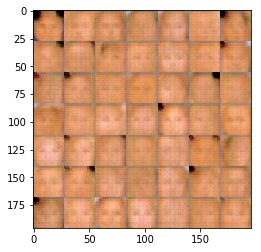

Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 0.6179
Epoch 1/1... Discriminator Loss: 1.5817... Generator Loss: 1.9302
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.9136
Epoch 1/1... Discriminator Loss: 1.1750... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 1.2480... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.2256... Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 1.9520
Epoch 1/1... Discriminator Loss: 1.4225... Generator Loss: 0.5604
Epoch 1/1... Discriminator Loss: 1.7807... Generator Loss: 0.2815


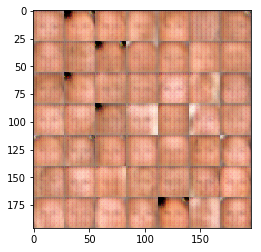

Epoch 1/1... Discriminator Loss: 0.6992... Generator Loss: 1.4662
Epoch 1/1... Discriminator Loss: 3.4364... Generator Loss: 0.0740
Epoch 1/1... Discriminator Loss: 1.2092... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 1.2565
Epoch 1/1... Discriminator Loss: 2.2631... Generator Loss: 3.0252
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 0.9093
Epoch 1/1... Discriminator Loss: 1.0894... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.4908


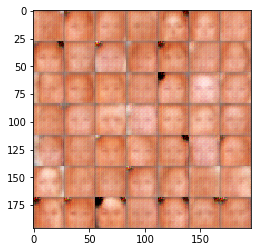

Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 0.5426
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.8708
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 1.2157
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 1.5453
Epoch 1/1... Discriminator Loss: 1.5283... Generator Loss: 0.4576
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 0.9518
Epoch 1/1... Discriminator Loss: 1.6318... Generator Loss: 2.3944
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.4974
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 1.2738


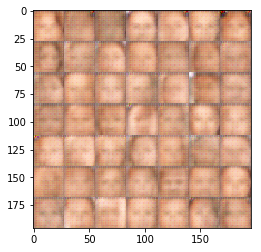

Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.4138
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 1.5609
Epoch 1/1... Discriminator Loss: 1.4976... Generator Loss: 0.4668
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.4716
Epoch 1/1... Discriminator Loss: 1.4809... Generator Loss: 1.2454
Epoch 1/1... Discriminator Loss: 1.4785... Generator Loss: 1.4296
Epoch 1/1... Discriminator Loss: 1.1416... Generator Loss: 0.7617
Epoch 1/1... Discriminator Loss: 1.6102... Generator Loss: 0.3612
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.8124
Epoch 1/1... Discriminator Loss: 2.4279... Generator Loss: 3.1398


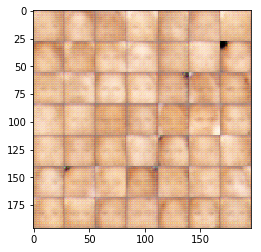

Epoch 1/1... Discriminator Loss: 1.6894... Generator Loss: 0.3329
Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 2.0109
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 1.3010
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 0.9063
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.5079
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 1.1126
Epoch 1/1... Discriminator Loss: 1.0981... Generator Loss: 0.8414
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 1.1657
Epoch 1/1... Discriminator Loss: 1.5107... Generator Loss: 0.4253


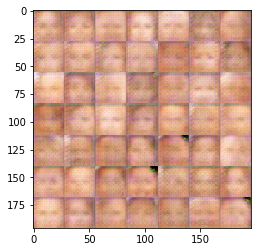

Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 1.0642
Epoch 1/1... Discriminator Loss: 1.1031... Generator Loss: 1.6228
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 1.0001
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 1.4484
Epoch 1/1... Discriminator Loss: 1.0928... Generator Loss: 1.1642
Epoch 1/1... Discriminator Loss: 1.5383... Generator Loss: 0.4142
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 1.2258
Epoch 1/1... Discriminator Loss: 1.5553... Generator Loss: 0.3670
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.4638


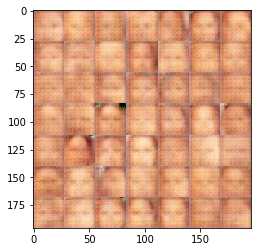

Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.8871
Epoch 1/1... Discriminator Loss: 1.2062... Generator Loss: 1.5604
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 1.5274... Generator Loss: 0.4274
Epoch 1/1... Discriminator Loss: 1.5771... Generator Loss: 0.3792
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 1.9116
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 1.3003
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.4834


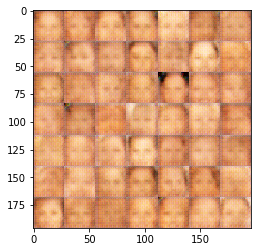

Epoch 1/1... Discriminator Loss: 1.2405... Generator Loss: 0.6402
Epoch 1/1... Discriminator Loss: 1.6840... Generator Loss: 2.0044
Epoch 1/1... Discriminator Loss: 1.4896... Generator Loss: 1.4062
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.4688... Generator Loss: 0.4447
Epoch 1/1... Discriminator Loss: 1.4342... Generator Loss: 0.5064
Epoch 1/1... Discriminator Loss: 1.4971... Generator Loss: 0.4875
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 1.1638
Epoch 1/1... Discriminator Loss: 1.0392... Generator Loss: 0.8337
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.5313


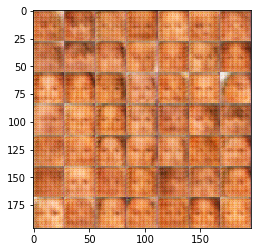

Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.4470
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.4798
Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.0720... Generator Loss: 0.8648
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.5956
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 1.3343
Epoch 1/1... Discriminator Loss: 1.6226... Generator Loss: 0.3419
Epoch 1/1... Discriminator Loss: 1.4620... Generator Loss: 0.4311


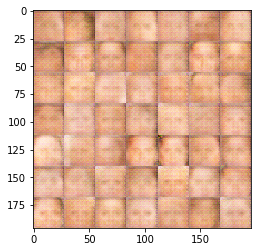

Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 1.1867... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.6266
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.5676
Epoch 1/1... Discriminator Loss: 1.0977... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 1.0741
Epoch 1/1... Discriminator Loss: 1.2056... Generator Loss: 0.7081
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.8826


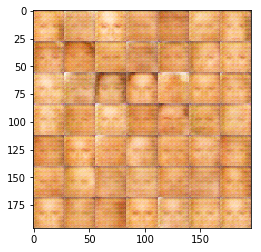

Epoch 1/1... Discriminator Loss: 1.3401... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.4601
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.6957... Generator Loss: 1.6247
Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 0.8837
Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.2508... Generator Loss: 0.6812
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.4625... Generator Loss: 1.3337


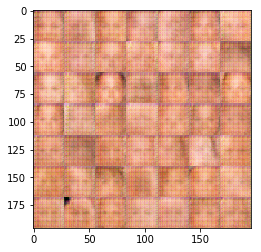

Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 1.3666
Epoch 1/1... Discriminator Loss: 1.1577... Generator Loss: 0.8262
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 1.1473... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 1.0703
Epoch 1/1... Discriminator Loss: 1.5381... Generator Loss: 0.4230
Epoch 1/1... Discriminator Loss: 1.1289... Generator Loss: 0.9095
Epoch 1/1... Discriminator Loss: 2.0722... Generator Loss: 0.2073
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 0.8719


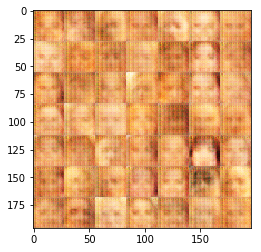

Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.5836
Epoch 1/1... Discriminator Loss: 1.5202... Generator Loss: 0.5679
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.9811
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 1.1043
Epoch 1/1... Discriminator Loss: 1.4740... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 1.5346... Generator Loss: 1.2688
Epoch 1/1... Discriminator Loss: 1.7689... Generator Loss: 0.3370
Epoch 1/1... Discriminator Loss: 1.3401... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.5341


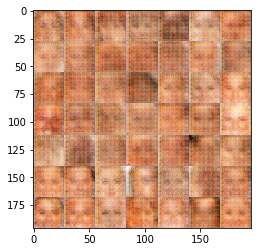

Epoch 1/1... Discriminator Loss: 1.1661... Generator Loss: 1.0282
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 1.1385
Epoch 1/1... Discriminator Loss: 1.0176... Generator Loss: 1.3971
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 1.0793
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.8609
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 0.4456
Epoch 1/1... Discriminator Loss: 1.5428... Generator Loss: 0.4220


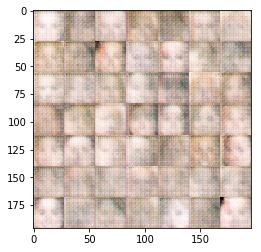

Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.5524
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.3592
Epoch 1/1... Discriminator Loss: 1.5833... Generator Loss: 0.4321
Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 1.0329
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.4430
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.7991
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 1.0820
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 0.9962


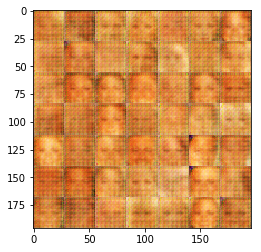

Epoch 1/1... Discriminator Loss: 1.1463... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.6208... Generator Loss: 0.4173
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.7419
Epoch 1/1... Discriminator Loss: 1.5668... Generator Loss: 0.3940
Epoch 1/1... Discriminator Loss: 1.4997... Generator Loss: 0.4214
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 1.5499
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.4953
Epoch 1/1... Discriminator Loss: 1.2440... Generator Loss: 0.6980


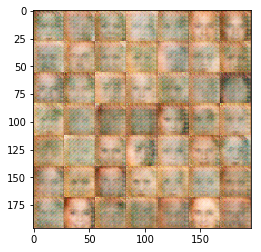

Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.5763
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 1.3049
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 1.3953
Epoch 1/1... Discriminator Loss: 1.5230... Generator Loss: 0.5574
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 1.8476
Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 1.0157
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 0.7499
Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.4666
Epoch 1/1... Discriminator Loss: 1.6497... Generator Loss: 0.3644
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.6279


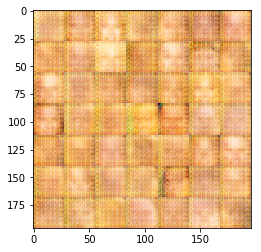

Epoch 1/1... Discriminator Loss: 1.7233... Generator Loss: 1.9638
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 1.2739
Epoch 1/1... Discriminator Loss: 1.7044... Generator Loss: 1.8782
Epoch 1/1... Discriminator Loss: 1.2671... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 0.9767
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.7481
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.9170
Epoch 1/1... Discriminator Loss: 1.2100... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 1.1559


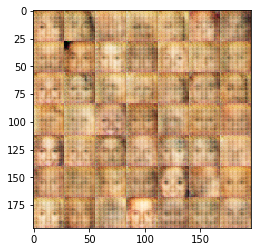

Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.5410
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.5431
Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.4585
Epoch 1/1... Discriminator Loss: 1.5175... Generator Loss: 0.3942
Epoch 1/1... Discriminator Loss: 1.1491... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.8717... Generator Loss: 0.2586
Epoch 1/1... Discriminator Loss: 1.2368... Generator Loss: 0.5756
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.4838
Epoch 1/1... Discriminator Loss: 1.6289... Generator Loss: 0.3472
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.4169


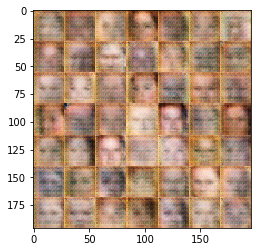

Epoch 1/1... Discriminator Loss: 1.4997... Generator Loss: 0.6994
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.4512... Generator Loss: 0.5446
Epoch 1/1... Discriminator Loss: 1.4978... Generator Loss: 1.2938
Epoch 1/1... Discriminator Loss: 1.0563... Generator Loss: 1.3255
Epoch 1/1... Discriminator Loss: 1.1042... Generator Loss: 1.0015
Epoch 1/1... Discriminator Loss: 1.5954... Generator Loss: 0.3798
Epoch 1/1... Discriminator Loss: 1.7219... Generator Loss: 0.3349
Epoch 1/1... Discriminator Loss: 1.5469... Generator Loss: 1.5401
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.8428


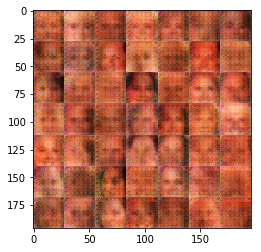

Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.5097
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 1.1893
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.8682
Epoch 1/1... Discriminator Loss: 1.7226... Generator Loss: 0.2984
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.9708
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.7909
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.8748
Epoch 1/1... Discriminator Loss: 1.5540... Generator Loss: 0.3935
Epoch 1/1... Discriminator Loss: 1.1780... Generator Loss: 1.0392


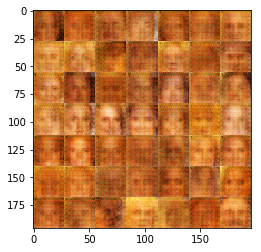

Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.4833
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.5727... Generator Loss: 0.3920
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.8888
Epoch 1/1... Discriminator Loss: 1.2111... Generator Loss: 0.7848
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.5105... Generator Loss: 0.4574
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.7605


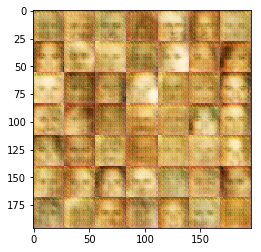

Epoch 1/1... Discriminator Loss: 1.5346... Generator Loss: 1.1684
Epoch 1/1... Discriminator Loss: 1.5451... Generator Loss: 0.3838
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.2745... Generator Loss: 0.9865
Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.4964
Epoch 1/1... Discriminator Loss: 1.7789... Generator Loss: 1.4755
Epoch 1/1... Discriminator Loss: 1.2162... Generator Loss: 0.9585
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.5974
Epoch 1/1... Discriminator Loss: 1.1684... Generator Loss: 0.7701


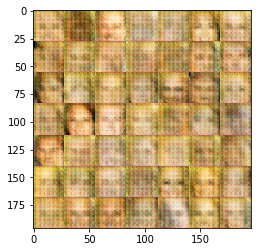

Epoch 1/1... Discriminator Loss: 1.4433... Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 1.3186
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 1.6944
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 0.9544
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 1.5990... Generator Loss: 0.3947
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 1.1574
Epoch 1/1... Discriminator Loss: 1.5268... Generator Loss: 0.3956
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.8807
Epoch 1/1... Discriminator Loss: 1.7404... Generator Loss: 0.3379


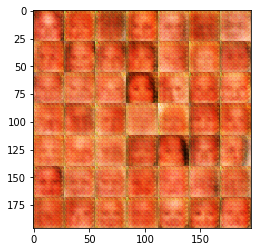

Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 1.1146... Generator Loss: 1.1108
Epoch 1/1... Discriminator Loss: 1.1977... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 1.3094
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.5790


In [36]:
batch_size = 64
z_dim = 100
learning_rate = 0.0009
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

Successfully generating faces, and generator loss is getting lower and smaller than the discrimator's loss.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.